dendrogram 

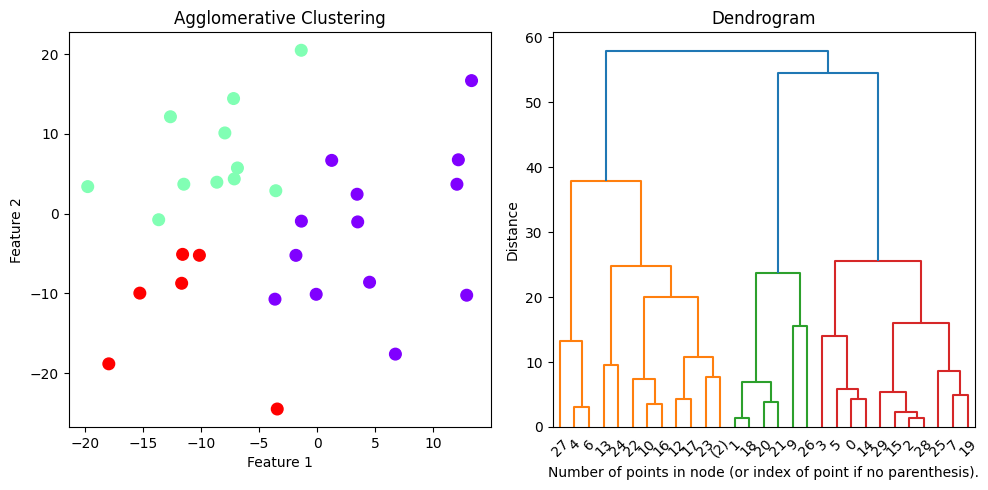

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=30, centers=3, random_state=42, cluster_std=10)

# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(X)

agg=AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg.fit(X)  


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i ,merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow',s=70)
ax1.set_title("Agglomerative Clustering")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

plt.sca(ax2)
plot_dendrogram(agg, truncate_mode='level', p=5)
plt.title("Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()